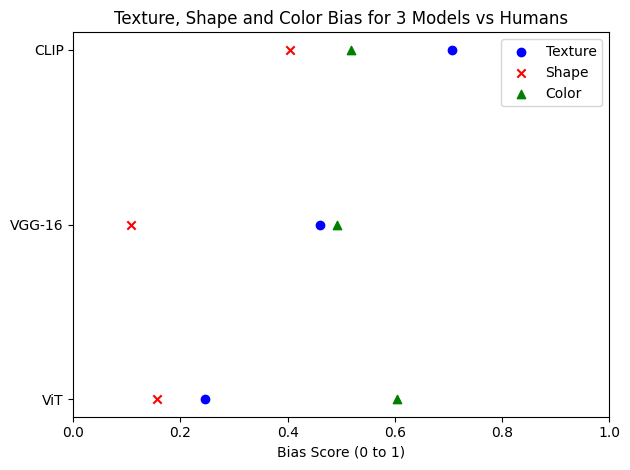

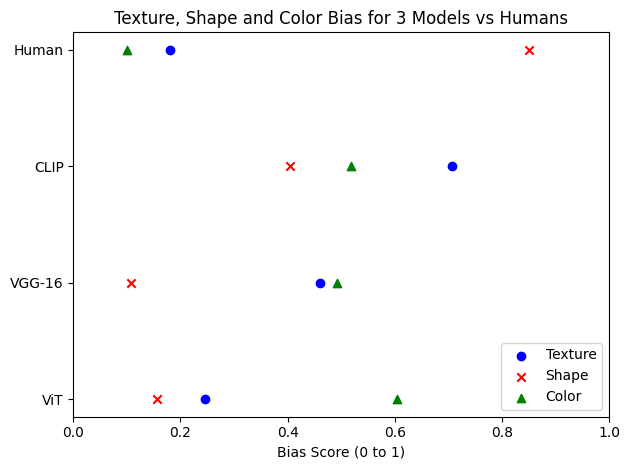

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plotter(bias1, bias2,bias1_name, bias2_name):
  models = ['ViT', 'VGG-16', 'CLIP']

  # Create the figure and axis
  fig, ax_bottom = plt.subplots()

  ax_bottom.scatter(bias1, [0, 1, 2], label=f"{bias1_name} Bias", marker='o', color='blue')
  ax_bottom.scatter(bias2, [0, 1, 2], label=f"{bias2_name} Bias", marker='x', color='red')

  # Set labels for the bottom axis
  ax_bottom.set_xlabel('Bias Score (0 to 1)')
  ax_bottom.set_yticks([0, 1, 2])
  ax_bottom.set_yticklabels(models)
  ax_bottom.set_xlim([0, 1])

  # Combine legends and display the plot
  ax_bottom.legend([bias1_name, bias2_name], loc='upper right')

  # Show the plot
  plt.title(f'{bias1_name} Bias and {bias2_name} Bias for 3 Models')
  plt.tight_layout()
  plt.show()


def plotterall(bias1, bias2, bias3, bias1_name, bias2_name, bias3_name):
  models = ['ViT', 'VGG-16', 'CLIP']

  # Create the figure and axis
  fig, ax_bottom = plt.subplots()

  ax_bottom.scatter(bias1, [0, 1, 2], label=f"{bias1_name} Bias", marker='o', color='blue')
  ax_bottom.scatter(bias2, [0, 1, 2], label=f"{bias2_name} Bias", marker='x', color='red')
  ax_bottom.scatter(bias3, [0, 1, 2], label=f"{bias3_name} Bias", marker='^', color='green')

  # Set labels for the bottom axis
  ax_bottom.set_xlabel('Bias Score (0 to 1)')
  ax_bottom.set_yticks([0, 1, 2])
  ax_bottom.set_yticklabels(models)
  ax_bottom.set_xlim([0, 1])

  # Combine legends and display the plot
  ax_bottom.legend([bias1_name, bias2_name, bias3_name], loc='upper right')

  # Show the plot
  plt.title(f'{bias1_name}, {bias2_name} and {bias3_name} Bias for 3 Models vs Humans')
  plt.tight_layout()
  plt.show()

def plotterwithuman(bias1, bias2, bias3, bias1_name, bias2_name, bias3_name):
  models = ['ViT', 'VGG-16', 'CLIP','Human']

  # Create the figure and axis
  fig, ax_bottom = plt.subplots()

  ax_bottom.scatter(bias1, [0, 1, 2, 3], label=f"{bias1_name} Bias", marker='o', color='blue')
  ax_bottom.scatter(bias2, [0, 1, 2, 3], label=f"{bias2_name} Bias", marker='x', color='red')
  ax_bottom.scatter(bias3, [0, 1, 2, 3], label=f"{bias3_name} Bias", marker='^', color='green')

  # Set labels for the bottom axis
  ax_bottom.set_xlabel('Bias Score (0 to 1)')
  ax_bottom.set_yticks([0, 1, 2, 3])
  ax_bottom.set_yticklabels(models)
  ax_bottom.set_xlim([0, 1])

  # Combine legends and display the plot
  ax_bottom.legend([bias1_name, bias2_name, bias3_name], loc='lower right')

  # Show the plot
  plt.title(f'{bias1_name}, {bias2_name} and {bias3_name} Bias for 3 Models vs Humans')
  plt.tight_layout()
  plt.show()

texture_bias = [0.245, 0.4613, 0.706]
shape_bias = [0.156, 0.108, 0.404]
color_bias = [ 0.605, 0.493, 0.518]
# texture_bias = [ 0.605, 0.493, 0.518]

texture_bias_human = [0.245, 0.4613, 0.706,0.18]
shape_bias_human = [0.156, 0.108, 0.404, 0.85]
color_bias_human = [ 0.605, 0.493, 0.518, 0.1]

name1 = 'Texture'
name2 = 'Shape'
name3 = 'Color'

# plotter(texture_bias, shape_bias, name1, name2)
# plotter(texture_bias, color_bias, name1, name3)

plotterall(texture_bias, shape_bias, color_bias, name1, name2, name3)
plotterwithuman(texture_bias_human, shape_bias_human, color_bias_human, name1, name2, name3)

**Imports**

In [ ]:
import os
import torch
import random
import math
import numpy as np
from PIL import Image
from pathlib import Path
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

**Picking an image from a useful dataset**

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 62835215.73it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# Load a sample image from CIFAR-10
def getrandomimg(dataset):
  random_idx = random.randint(0, len(dataset) - 1)
  sample_image, _ = dataset[random_idx]
  sample_image = sample_image.unsqueeze(0)
  return sample_image

sample_image = getrandomimg(dataset)
print(sample_image.shape)

torch.Size([1, 3, 128, 128])


# Model 1 - Depthwise Convolution

input channels = 3


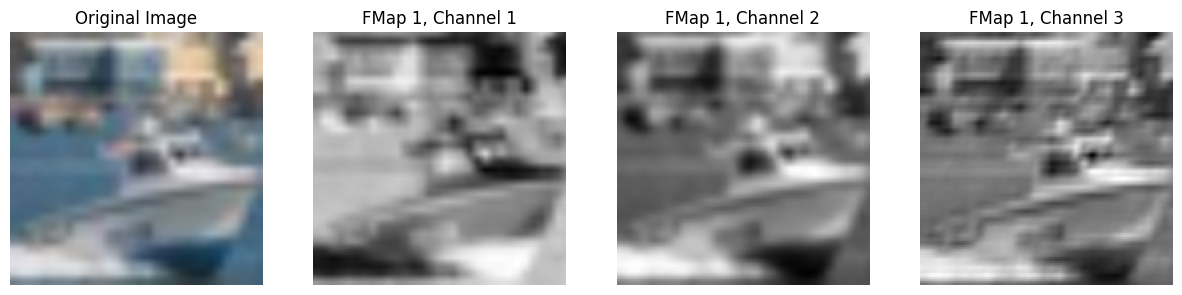

In [ ]:
class DepthwiseConvModel(nn.Module):
    def __init__(self, kernel_size, isgrayscale=False):
        super(DepthwiseConvModel, self).__init__()
        in_channels = 1 if isgrayscale else 3
        print("input channels =",in_channels)
        self.depthwise_conv = nn.Conv2d(
            in_channels=in_channels,
            out_channels=in_channels,
            kernel_size=kernel_size,
            groups=in_channels          # Depthwise convolution groups
        )

    def forward(self, x):
        return self.depthwise_conv(x)

def visualize_feature_maps(image, feature_maps):
    # Visualize the original image and its feature maps
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(image.squeeze().permute(1, 2, 0), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')


    for i, fmap in enumerate(feature_maps):
        for c in range(fmap.size(1)):  # Iterate through channels
            plt.subplot(1, 4, c+2)
            plt.imshow(fmap[0,c].squeeze(0).detach().numpy(), cmap='gray')  # Show each channel separately
            plt.title(f'FMap {i + 1}, Channel {c + 1}')
            plt.axis('off')


    plt.show()



model = DepthwiseConvModel(kernel_size = 3)
# sample_image = getrandomimg(dataset)

# Pass the image through the model to get feature maps and visualize them
feature_maps = model(sample_image)
visualize_feature_maps(sample_image, [feature_maps])

# Model 2 - Self Attention

torch.Size([1, 3, 16384]) torch.Size([1, 16384, 3])
attention-weights-shape torch.Size([1, 16384, 16384])
output-shape torch.Size([1, 3, 128, 128])


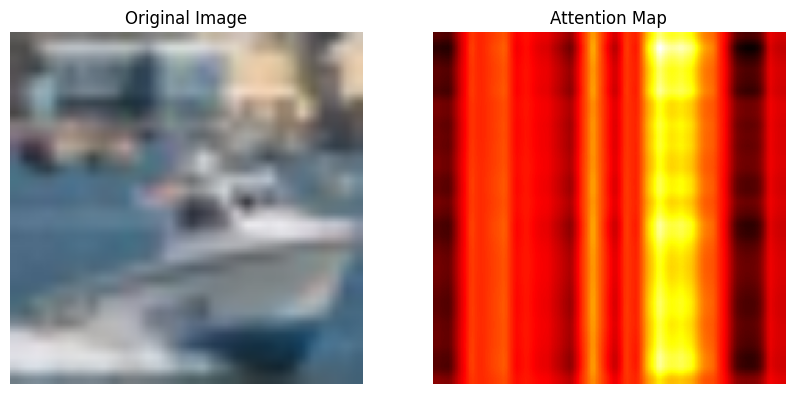

In [ ]:
class SelfAttentionModel(nn.Module):
    def __init__(self):
        super(SelfAttentionModel, self).__init__()

    def forward(self, x):
        # Assuming x is of shape (batch_size, channels, height, width)
        batch_size, channels, height, width = x.size()
        # print(x.shape)

        # Flatten the spatial dimensions
        x_flat = x.view(batch_size, channels, -1)  # Shape: (batch_size, channels, height*width)
        # print(x_flat.shape)

        x_flat_t = x_flat.permute(0, 2, 1)        # Transpose of x_flat
        print(x_flat.shape,x_flat_t.shape)

        # Compute attention scores
        attention_scores = torch.matmul(x_flat_t, x_flat)  # Shape: (batch_size, height*width, height*width)
        # print(attention_scores.shape)

        # Softmax to normalize attention scores
        attention_weights = torch.softmax(attention_scores, dim=-1)  # Shape: (batch_size, height*width, height*width)
        print("attention-weights-shape",attention_weights.shape)

        output = torch.matmul(attention_weights, x_flat_t)  # Shape: (batch_size, height*width, channels)

        # Reshape back to original dimensions
        output = output.permute(0, 2, 1).view(batch_size, channels, height, width)
        print("output-shape",output.shape)


        # #Computing self attention myself ...
        # seq_len = height * width  # Number of spatial positions (tokens)
        # attention_scores = torch.zeros(batch_size, seq_len, seq_len)
        # aws = torch.zeros(batch_size, seq_len, seq_len)
        # attention_output = torch.zeros(batch_size, channels, seq_len)

        #  # 1. Compute attention scores (QK^T) manually
        # attention_scores = torch.matmul(x_flat_t, x_flat)

        # # 2. Compute softmax manually
        # def softmax(x):
        #   """Compute softmax values for each sets of scores in x."""
        #   # e_x = np.exp(x - np.max(x))
        #   # return e_x / e_x.sum(axis=0)
        #   e_x = torch.exp(x - torch.max(x))
        #   return e_x / e_x.sum(dim=-1, keepdim=True)

        # aws[0] = softmax(attention_scores)

        # # 3. Compute weighted sum of values
        # attention_output = torch.matmul(aws, x_flat_t)

        # # Reshape the output back to [batch_size, channels, height, width]
        # attn_output = attention_output.permute(0, 2, 1).view(batch_size, channels, height, width)

        return output, attention_weights

def visualize_attention_maps(image, attention_weights):
    # Visualize the original image, feature maps, and attention map
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1,  2, 1)
    plt.imshow(image.squeeze().permute(1, 2, 0).numpy())  # Change to (height, width, channels)
    plt.title('Original Image')
    plt.axis('off')

    # Attention Map
    # plt.subplot(1, len(feature_maps) + 2, len(feature_maps) + 2)
    plt.subplot(1, 2, 2)
    attention_map = attention_weights[0].detach().numpy().reshape(128, 128,128,128)
    plt.imshow(attention_map.sum(axis=2).sum(axis=1), cmap='hot')
    # plt.imshow(attention_weights[0].detach().numpy(), cmap='hot')  # Visualizing attention of the first image
    plt.title('Attention Map')
    plt.axis('off')

    plt.show()


# Initialize the model
model = SelfAttentionModel()
# sample_image = getrandomimg(dataset)

# Pass the image through the model to get feature maps and attention weights and visualize them
_, attention_weights = model(sample_image)
visualize_attention_maps(sample_image,attention_weights)

# Model 3 - Post-normalization Combination

conv output shape torch.Size([1, 3, 128, 128])
attention-weights-shape torch.Size([1, 16384, 16384])
attn output shape torch.Size([1, 3, 128, 128])


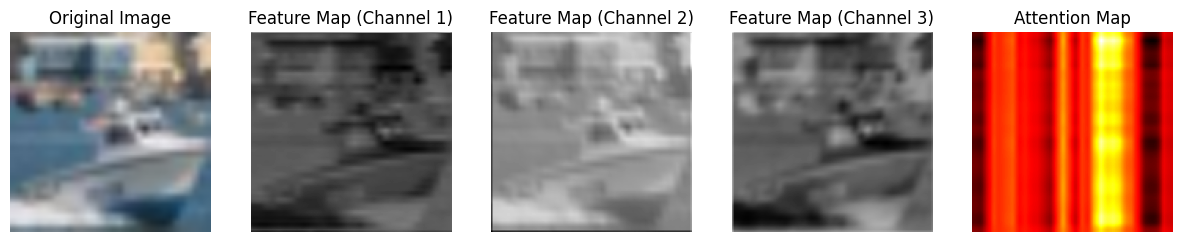

In [ ]:
class PostNormalizationCombo(nn.Module):   #just the addition of outputs of depthwiseconv and selfattention
    def __init__(self, kernel_size, isgrayscale=False):
        super(PostNormalizationCombo, self).__init__()
        self.in_channels = 1 if isgrayscale else 3

        # Depthwise convolution layer
        self.depthwise_conv = nn.Conv2d(
            in_channels=self.in_channels,
            out_channels=self.in_channels,
            kernel_size=kernel_size,
            groups=self.in_channels,  # Depthwise convolution
            padding=kernel_size // 2,  # Keep same spatial dimensions
        )

    def forward(self, x):
        batch_size, channels, height, width = x.size()

        # Apply depthwise convolution
        conv_output = self.depthwise_conv(x)  # (batch_size, channels, height, width)
        print("conv output shape",conv_output.shape)

        # Flatten spatial dimensions for attention mechanism
        x_flat = x.view(batch_size, channels, -1)   # Shape: (batch_size, channels, height*width)
        x_flat_t = x_flat.permute(0, 2, 1)          # Shape: (batch_size, height*width, channels)

        # print(x_flat.shape, x_flat_t.shape)

        # Compute attention scores
        attention_scores = torch.matmul(x_flat_t, x_flat)  # Shape: (batch_size, height*width, height*width)
        # print(attention_scores.shape)

        # Normalize attention scores using softmax
        attention_weights = torch.softmax(attention_scores, dim=-1)  # Shape: (batch_size, height*width, height*width)
        print("attention-weights-shape",attention_weights.shape)

        # Compute weighted sum of values (self-attention output)
        attention_output = torch.matmul(attention_weights, x_flat_t)  # Shape: (batch_size, height*width, channels)
        # print(attention_output.shape)

        # Reshape attention output back to (batch_size, channels, height, width)
        attention_output = attention_output.permute(0, 2, 1).view(batch_size, channels, height, width)
        print("attn output shape",attention_output.shape)

        # Combine depthwise convolution output and attention output
        combined_output = conv_output + attention_output
        # print(combined_output.shape)

        return conv_output, attention_weights


# Visualization function
def visualize_maps(image, feature_maps, attention_weights):
    plt.figure(figsize=(15, 8))

    # Visualize original image
    plt.subplot(1, feature_maps.size(1) + 2, 1)
    plt.imshow(image.squeeze().permute(1, 2, 0).numpy())  # Convert (C, H, W) to (H, W, C)
    plt.title('Original Image')
    plt.axis('off')

    # Visualize each channel's feature map
    for c in range(feature_maps.size(1)):  # Iterate over channels
        plt.subplot(1, feature_maps.size(1) + 2, c + 2)
        plt.imshow(feature_maps[0, c].detach().numpy(), cmap='gray')
        plt.title(f'Feature Map (Channel {c + 1})')
        plt.axis('off')


    # Attention Map
    plt.subplot(1, feature_maps.size(1) + 2, feature_maps.size(1) + 2)
    attention_map = attention_weights[0].detach().numpy().reshape(128, 128,128,128)
    plt.imshow(attention_map.sum(axis=2).sum(axis=1), cmap='hot')
    # plt.imshow(attention_weights[0].detach().numpy(), cmap='hot')  # Visualizing attention of the first image
    plt.title('Attention Map')
    plt.axis('off')

    plt.show()


# Initialize the model
model = PostNormalizationCombo(kernel_size=3)
# sample_image = getrandomimg(dataset)

# Pass the image through the model to get feature maps and attention weights and visualize them
conv_output, attention_weights = model(sample_image)
visualize_maps(sample_image, conv_output, attention_weights)

# Model 4 - Pre-normalization Combination

In [ ]:
def add_kernel_to_attention_scores(scores, kernel, image_size):
    """
    Adds the kernel weights W_i-j to the attention scores x_i^T x_j in a localized fashion.

    Args:
    - scores: torch.Tensor of shape [1, 16384, 16384], representing attention scores (x_i^T x_j).
    - kernel: torch.Tensor of shape [3, 3], the convolution kernel.
    - image_size: tuple, the original (height, width) of the image.

    Returns:
    - Updated attention scores with kernel added locally.
    """
    batch_size, seq_len, _ = scores.shape
    height, width = image_size
    kernel_size = kernel.shape[0]  # Assumed to be square (3x3 in this case)

    # Reshape attention scores back to image space (assuming square image and flattening)
    scores_image_space = scores.view(batch_size, height, width, height, width)

    # Create an empty tensor to store the kernel-added scores
    updated_scores = torch.zeros_like(scores_image_space)

    # Apply kernel to local neighborhoods
    pad = kernel_size // 2
    padded_scores = F.pad(scores_image_space, (pad, pad, pad, pad))

    # Iterate through each pixel in the flattened space
    for i in range(height):
        for j in range(width):
            # Local neighborhood of scores around pixel (i, j)
            local_scores = padded_scores[:, i:i+kernel_size, j:j+kernel_size, i:i+kernel_size, j:j+kernel_size]

            # Expand the kernel to match the shape of local_scores
            kernel_expanded = kernel.view(1, 1, kernel_size, kernel_size).expand_as(local_scores)

            # Add the kernel to local context
            updated_scores[:, i, j, i, j] = (local_scores + kernel_expanded).sum()

    # Reshape the updated scores back to flattened form
    updated_scores_flat = updated_scores.view(batch_size, seq_len, seq_len)
    return updated_scores_flat

def softmax_with_kernel_addition(scores, kernel, image_size):
    """
    Computes the softmax of the scores matrix after adding the kernel weights.

    Args:
    - scores: torch.Tensor of shape [1, 16384, 16384], representing attention scores (x_i^T x_j).
    - kernel: torch.Tensor of shape [3, 3], the convolution kernel.
    - image_size: tuple, the original (height, width) of the image.

    Returns:
    - Softmax-normalized scores after kernel addition.
    """
    # Add the kernel weights to the scores matrix
    scores_with_kernel = add_kernel_to_attention_scores(scores, kernel, image_size)

    def softmax(x):
          """Compute softmax values for each sets of scores in x."""
          e_x = torch.exp(x - torch.max(x))
          return e_x / e_x.sum(dim=-1, keepdim=True)

    # Subtract max value for numerical stability
    # scores_with_kernel -= scores_with_kernel.max(dim=-1, keepdim=True)[0]
    # exp_scores = torch.exp(scores_with_kernel)
    # softmax_scores = exp_scores / exp_scores.sum(dim=-1, keepdim=True)

    # OR

    softmax_scores = softmax(scores_with_kernel)
    # print(softmax_scores[0].shape)

    return softmax_scores

attn scores torch.Size([1, 16384, 16384])
attention weights torch.Size([1, 16384, 16384])
output-shape torch.Size([1, 3, 128, 128])


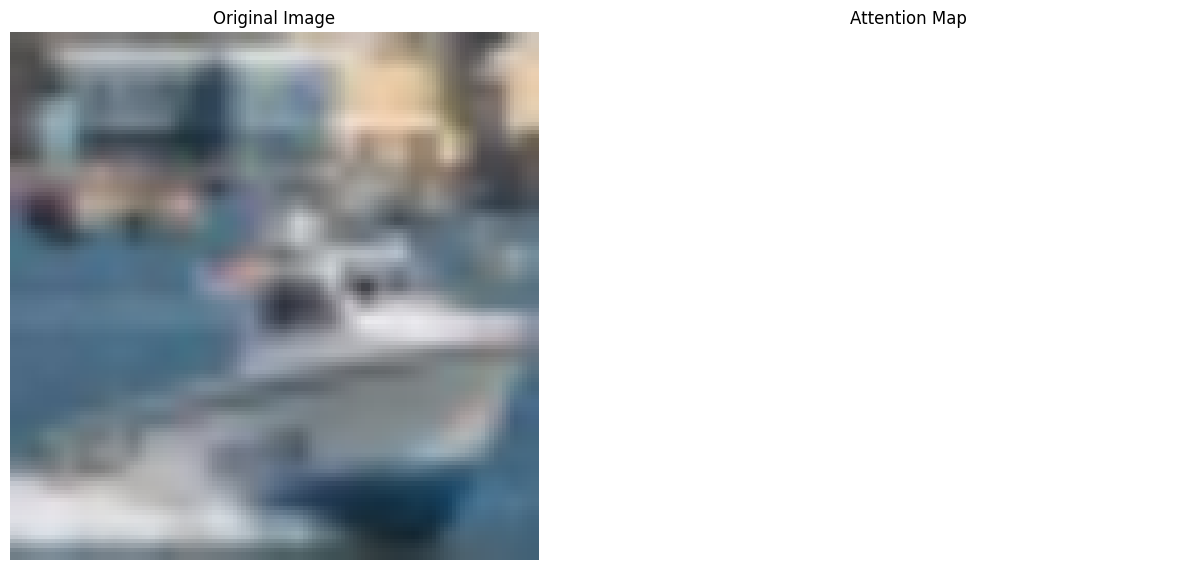

In [ ]:
class PreNormalizationCombo(nn.Module):
    def __init__(self, kernel_size, isgrayscale=False):
        super(PreNormalizationCombo, self).__init__()
        self.in_channels = 1 if isgrayscale else 3

        # Depthwise convolution layer
        self.depthwise_conv = nn.Conv2d(
            in_channels=self.in_channels,
            out_channels=self.in_channels,
            kernel_size=kernel_size,
            groups=self.in_channels,   # Depthwise convolution
            padding=kernel_size // 2,  # Keep same spatial dimensions
        )

    def forward(self, x):
        batch_size, channels, height, width = x.size()

        # Flatten spatial dimensions for attention mechanism
        x_flat = x.view(batch_size, channels, -1)  # Shape: (batch_size, channels, height*width)
        x_flat_t = x_flat.permute(0, 2, 1)  # Shape: (batch_size, height*width, channels)
        # print(x_flat.shape, x_flat_t.shape)

        # Compute attention scores (pre-normalization with convolutional kernel)
        attention_scores = torch.matmul(x_flat_t, x_flat)  # Shape: (batch_size, height*width, height*width)
        print("attn scores",attention_scores.shape)

        kernel = torch.rand(3, 3)

        attention_weights = softmax_with_kernel_addition(attention_scores, kernel, (height,width))
        print("attention weights",attention_weights.shape)

        output = torch.matmul(attention_weights, x_flat_t)  # Shape: (batch_size, height*width, channels)

        # Reshape back to original dimensions
        output = output.permute(0, 2, 1).view(batch_size, channels, height, width)
        print("output-shape",output.shape)

        return attention_weights

# Instantiate the model
model = PreNormalizationCombo(kernel_size=3)
# sample_image = getrandomimg(dataset)

# Pass the image through the model to get feature maps and attention weights and visualize them
attention_weights = model(sample_image)

def visualize_maps(image, attention_weights):
    plt.figure(figsize=(15, 8))

    # Visualize original image
    plt.subplot(1, 2, 1)
    plt.imshow(image.squeeze().permute(1, 2, 0).numpy())  # Convert (C, H, W) to (H, W, C)
    plt.title('Original Image')
    plt.axis('off')

    # Visualize attention map
    plt.subplot(1,2,2)
    plt.imshow(attention_weights[0].detach().numpy(), cmap='hot')  # Visualizing attention of the first image
    plt.title('Attention Map')
    plt.axis('off')

    plt.show()

visualize_maps(sample_image, attention_weights)

# Model 5 - Attention Modulated Convolution

x shape torch.Size([1, 3, 128, 128])
Q, K shape: torch.Size([1, 3, 128, 128]), torch.Size([1, 3, 128, 128])
Q_flat, K_flat shape: torch.Size([1, 3, 16384]), torch.Size([1, 3, 16384])
Attention scores shape: torch.Size([1, 16384, 16384])
Attention weights shape: torch.Size([1, 128, 128, 128, 128])
Attention output shape: torch.Size([1, 3, 128, 128])
Convolution output shape: torch.Size([1, 3, 128, 128])
Combined output shape: torch.Size([1, 3, 128, 128])
Final output shape: torch.Size([1, 3, 128, 128])


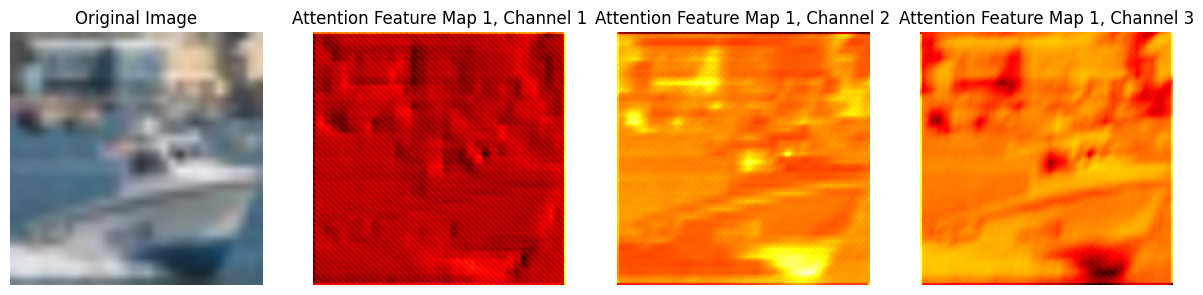

In [ ]:
class AttentionModulatedConvolution(nn.Module):
    def __init__(self, kernel_size, isgrayscale=False):
        super(AttentionModulatedConvolution, self).__init__()
        in_channels = 1 if isgrayscale else 3
        self.in_channels = in_channels

        # Depthwise convolution
        self.depthwise_conv = nn.Conv2d(
            in_channels=in_channels,
            out_channels=in_channels,
            kernel_size=kernel_size,
            groups=in_channels,  # Depthwise convolution for local context
            padding=kernel_size // 2  # Keep the same spatial dimensions
        )

        # 1x1 convolution to project queries, keys, and values
        self.query_conv = nn.Conv2d(in_channels, in_channels, kernel_size=1)
        self.key_conv = nn.Conv2d(in_channels, in_channels, kernel_size=1)

    def forward(self, x):
        batch_size, in_channels, height, width = x.shape
        print("x shape",x.shape)

        Q = self.query_conv(x)
        K = self.key_conv(x)
        print(f"Q, K shape: {Q.shape}, {K.shape}")

        # Compute self-attention scores (Q * K^T) for all spatial positions
        Q_flat = Q.view(batch_size, in_channels, height * width)  # Flatten spatial dimensions
        K_flat = K.view(batch_size, in_channels, height * width)  # Flatten spatial dimensions
        print(f"Q_flat, K_flat shape: {Q_flat.shape}, {K_flat.shape}")

        # Attention score (dot product between Q and K)
        attention_scores = torch.bmm(Q_flat.transpose(1, 2), K_flat)  # Shape: [batch_size, height*width, height*width]
        print(f"Attention scores shape: {attention_scores.shape}")

        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=-1)  # Shape: [batch_size, height*width, height*width]
        # print(f"Attention weights shape: {attention_weights.shape}")
        attention_weights = attention_weights.view(batch_size, height, width, height, width)         # Reshape the attention weights back to image grid
        print(f"Attention weights shape: {attention_weights.shape}")

        # Apply attention weights to the value tensor V = X
        x_flat = x.view(batch_size, in_channels, height * width)  # Flatten V for batched matrix multiplication

        attention_out = torch.bmm(attention_weights.view(batch_size, height * width, height * width), x_flat.transpose(1, 2))  # Shape: [batch_size, height*width, channels]
        attention_out = attention_out.view(batch_size, in_channels, height, width)  # Reshape back to spatial dimensions
        print(f"Attention output shape: {attention_out.shape}")

        # Apply depthwise convolution to the input feature map X
        conv_out = self.depthwise_conv(x)  # Shape: [batch_size, channels, height, width]
        print(f"Convolution output shape: {conv_out.shape}")

        # Combine attention and convolution outputs
        combined_out = attention_out * conv_out  # Element-wise multiplication
        print(f"Combined output shape: {combined_out.shape}")

        final_out = combined_out / x
        print(f"Final output shape: {final_out.shape}")

        return final_out

def visualize_attention_feature_maps(image, feature_maps):
    # Visualize the original image and its feature maps
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(image.squeeze().permute(1, 2, 0), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')


    for i, fmap in enumerate(feature_maps):
        for c in range(fmap.size(1)):  # Iterate through channels
            plt.subplot(1, 4, c+2)
            plt.imshow(fmap[0,c].squeeze(0).detach().numpy(), cmap='hot')  # Show each channel separately
            plt.title(f'Attention Feature Map {i + 1}, Channel {c + 1}')
            plt.axis('off')

    plt.show()


model = AttentionModulatedConvolution(kernel_size = 3)
# sample_image = getrandomimg(dataset)

# Pass the image through the model to get feature maps and visualize them
attention_feature_maps = model(sample_image)
visualize_attention_feature_maps(sample_image, [attention_feature_maps])

# Model 6 - Convolution Modulated Attention

input channels = 3
x shape torch.Size([1, 3, 128, 128])
conv output shape torch.Size([1, 3, 128, 128])
softmax output shape torch.Size([1, 3, 128, 128])
V shape: torch.Size([1, 3, 128, 128])
output shape torch.Size([1, 3, 128, 128])


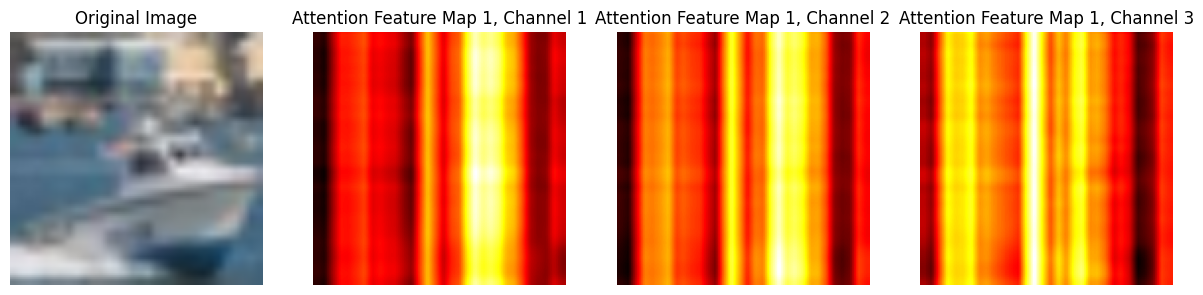

In [ ]:
class ConvolutionModulatedAttention(nn.Module):
    def __init__(self, kernel_size, isgrayscale=False):
        super(ConvolutionModulatedAttention, self).__init__()
        in_channels = 1 if isgrayscale else 3
        print("input channels =",in_channels)
        self.depthwise_conv = nn.Conv2d(
            in_channels=in_channels,
            out_channels=in_channels,
            kernel_size=kernel_size,
            groups=in_channels,          # Depthwise convolution groups
            padding=kernel_size // 2,    # Keep same spatial dimensions
        )

        # dim = 128
        # self.value = nn.Linear(dim, dim, bias=False)

    def forward(self, x):
        batch_size, in_channels, height, width = x.shape
        print("x shape",x.shape)

        conv_out = self.depthwise_conv(x)
        print("conv output shape",conv_out.shape)

        soft_out = F.softmax(conv_out, dim=-1)
        print("softmax output shape",soft_out.shape)

        # V = self.value(x)
        V = x
        print(f"V shape: {V.shape}")

        out = torch.matmul(soft_out,V)
        print("output shape",out.shape)

        return out

def visualize_attention_feature_maps(image, feature_maps):
    # Visualize the original image and its feature maps
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(image.squeeze().permute(1, 2, 0), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')


    for i, fmap in enumerate(feature_maps):
        for c in range(fmap.size(1)):  # Iterate through channels
            plt.subplot(1, 4, c+2)
            plt.imshow(fmap[0,c].squeeze(0).detach().numpy(), cmap='hot')  # Show each channel separately
            plt.title(f'Attention Feature Map {i + 1}, Channel {c + 1}')
            plt.axis('off')



model = ConvolutionModulatedAttention(kernel_size = 3)
# sample_image = getrandomimg(dataset)

# Pass the image through the model to get feature maps and visualize them
attention_feature_maps = model(sample_image)
visualize_attention_feature_maps(sample_image, [attention_feature_maps])